In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ucl-202122-uefa-champions-league/defending.csv
/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv
/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv
/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv
/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv
/kaggle/input/ucl-202122-uefa-champions-league/goals.csv
/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv
/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import os

In [3]:
files_base_dir =  '/kaggle/input/ucl-202122-uefa-champions-league'
all_players_file = 'key_stats'

players_df = pd.read_csv(f'{files_base_dir}/{all_players_file}.csv')
players_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [4]:
players_df = players_df.set_index(['player_name', 'club','position']).stack().unstack()
players_df.head()

,,,minutes_played,match_played,goals,assists,distance_covered
player_name,club,position,,,,,
Aaronson,Salzburg,Midfielder,715,8,0,2,103.5
Abubakari,Malmö,Forward,116,4,0,0,15.3
Acuña,Sevilla,Defender,379,5,0,0,43.2
Adams,Leipzig,Midfielder,292,5,0,0,38.9
Adamu,Salzburg,Forward,231,8,1,0,32.6


In [5]:
players_df.columns

Index(['minutes_played', 'match_played', 'goals', 'assists',
       'distance_covered'],
      dtype='object')

In [6]:
files = ['attacking', 'defending', 'goalkeeping', 'attempts', 'disciplinary', 'distributon', 'goals']

for file in files:
    players_extracted = pd.read_csv(f"{files_base_dir}/{file}.csv")
    players_extracted = players_extracted.set_index(['player_name', 'club', 'position']).stack().unstack()
    
    players_extracted.drop('serial', axis=1, inplace=True, errors='ignore')
    for col in list(players_df.columns):
        players_extracted.drop(col, axis=1, inplace=True, errors='ignore')
    
    players_df = pd.concat([
        players_df,
        players_extracted
    ], axis=1)
players_df.reset_index(inplace=True)
players_df.fillna(0.0, inplace=True)

In [7]:
players_df.columns


Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered', 'corner_taken', 'offsides',
       'dribbles', 'balls_recoverd', 'tackles', 't_won', 't_lost',
       'clearance_attempted', 'saved', 'conceded', 'saved_penalties',
       'cleansheets', 'punches made', 'total_attempts', 'on_target',
       'off_target', 'blocked', 'fouls_committed', 'fouls_suffered', 'red',
       'yellow', 'pass_accuracy', 'pass_attempted', 'pass_completed',
       'cross_accuracy', 'cross_attempted', 'cross_complted',
       'freekicks_taken', 'right_foot', 'left_foot', 'headers', 'others',
       'inside_area', 'outside_areas', 'penalties'],
      dtype='object')

In [8]:
players_df.describe()


,minutes_played,match_played,goals,assists,corner_taken,offsides,dribbles,balls_recoverd,tackles,t_won,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,329.845539,5.062583,0.490013,0.374168,0.782956,0.332889,2.105193,13.697736,3.950732,1.727031,...,5.145140,1.380826,4.430093,0.237017,0.169108,0.079893,0.005326,0.442077,0.050599,0.047936
std,248.883454,2.739357,1.310305,0.843689,3.341780,1.240848,6.611776,14.799026,4.905667,2.503076,...,8.819159,2.844664,6.567808,0.806483,0.636159,0.333079,0.072835,1.227045,0.268520,0.283489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,490.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500000,6.000000,2.000000,...,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1230.000000,13.000000,15.000000,7.000000,36.000000,10.000000,83.000000,76.000000,35.000000,18.000000,...,81.000000,24.000000,53.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000


# Forwards

In [9]:
def plot_scatter(data, x, y, xlabel, ylabel, title='', hue=None, height=7, text_spacing=0.3):
    fgrid = sns.lmplot(data=data, x=x, y=y, hue=hue, height=height, aspect=1.5)
    ax = fgrid.axes[0,0]
    
    plt.title(f"{title} {xlabel}/{ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for i, row in data.iterrows():
        ax.text(row[x] + text_spacing, row[y], row['player_name'], fontsize=7)

In [10]:
# forwards_df = players_df[(players_df['goals'] > 0) & (players_df['position'] == 'Forward')].reset_index(drop=True)
# forward_cols = ['player_name', 'club', 'goals', 'offsides', 'assists']
# forwards_df.loc[:, forward_cols].head()

forwards_df = players_df[(players_df['goals'] > 0) & (players_df['position'] == 'Forward')].reset_index(drop=True)
forwards_cols = ['player_name', 'club', 'goals', 'offsides', 'assists']
forwards_df.loc[:, forwards_cols].head()

,player_name,club,goals,offsides,assists
0,Adamu,Salzburg,1.0,0.0,0.0
1,Adeyemi,Salzburg,3.0,0.0,1.0
2,Alcácer,Villarreal,1.0,0.0,0.0
3,Alexis Sánchez,Inter,1.0,3.0,1.0
4,André Silva,Leipzig,3.0,9.0,2.0


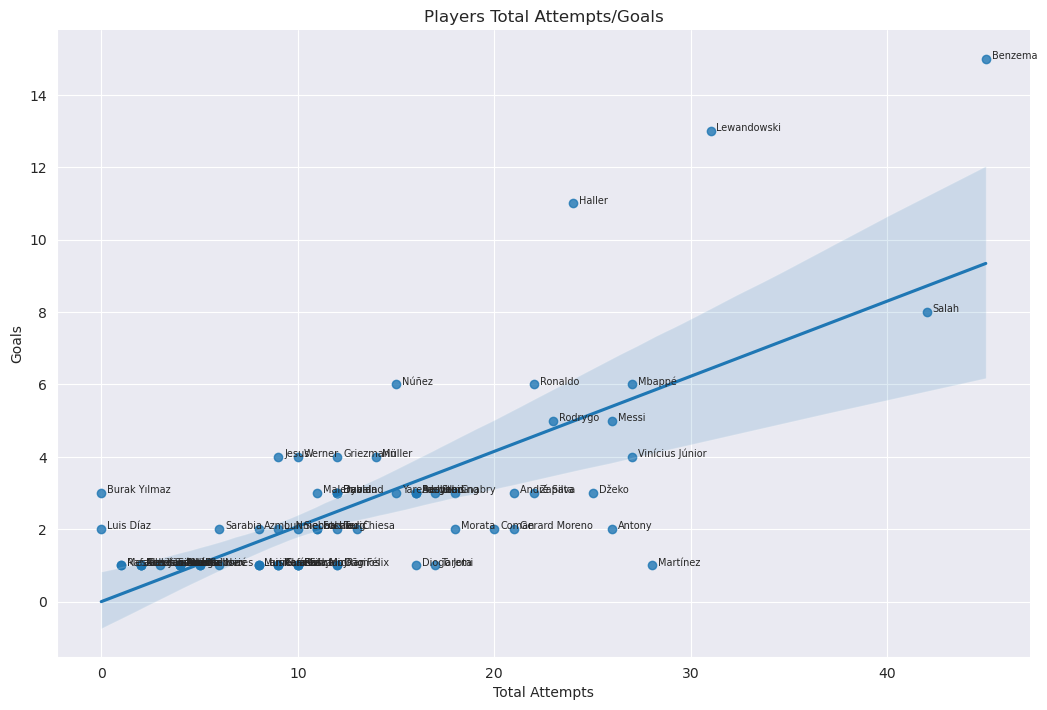

In [11]:
plot_scatter(forwards_df, 'total_attempts', 'goals', xlabel='Total Attempts', ylabel='Goals', title='Players')

In [12]:
# fgrid = sns.lmplot(data=forwards_df, x='total_attempts', y='goals', hue=None, height=7, aspect=1.5)
# ax = fgrid.axes[0,0]

# plt.title(f"{'Players'} {'Total Attempts'}/{'Goals'}")
# plt.xlabel('Total Attempts')
# plt.ylabel('Goals')

# for i, row in forwards_df.iterrows():
#     ax.text(row['total_attempts'] + 0.3, row['goals'], row['player_name'], fontsize=7)
#     #row['total_attempts'] => trục x
#     #row['goals'] => trục y
#     #row['player_name'] => tên cầu thủ

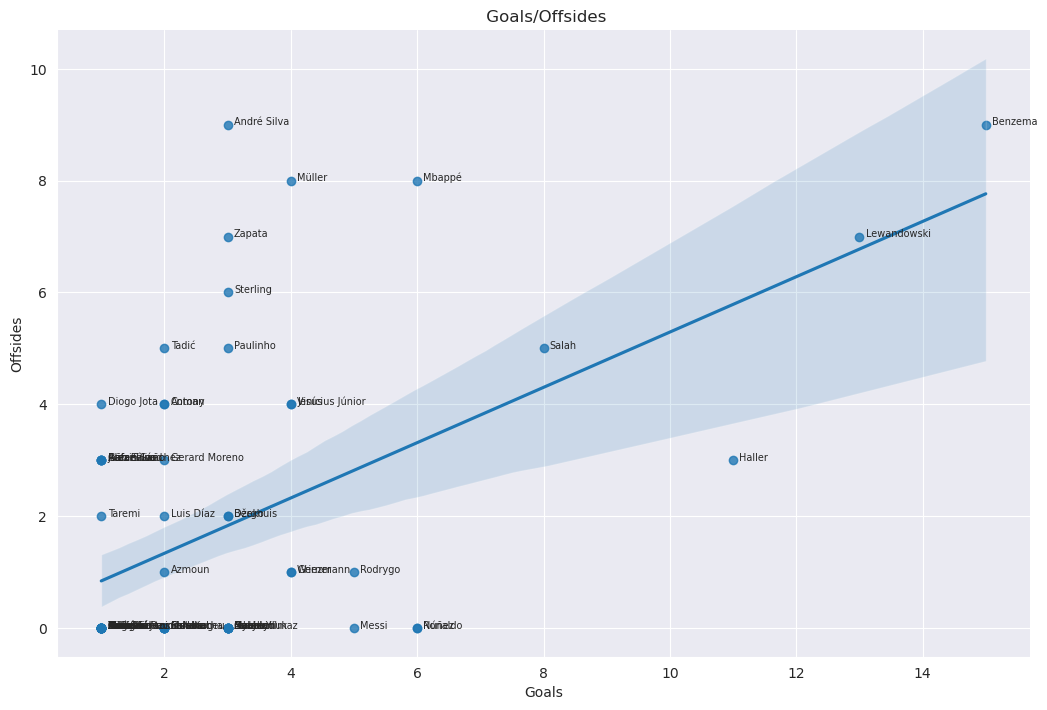

In [13]:
plot_scatter(forwards_df, 'goals', 'offsides', xlabel='Goals', ylabel='Offsides', text_spacing=0.1)

We know that football is not only about the goals, but also about how you can assist your teammates to score as well. Let's take a look at this two stats.



In [14]:
forwards_df['goal_contributions'] = forwards_df['goals'] + forwards_df['assists']
forwards_cols.append('goal_contributions')
forwards_df.loc[:, forwards_cols].sort_values('goal_contributions', ascending=False).head()

,player_name,club,goals,offsides,assists,goal_contributions
35,Lewandowski,Bayern,13.0,7.0,3.0,16.0
8,Benzema,Real Madrid,15.0,9.0,1.0,16.0
29,Haller,Ajax,11.0,3.0,1.0,12.0
66,Vinícius Júnior,Real Madrid,4.0,4.0,6.0,10.0
41,Mbappé,Paris,6.0,8.0,4.0,10.0


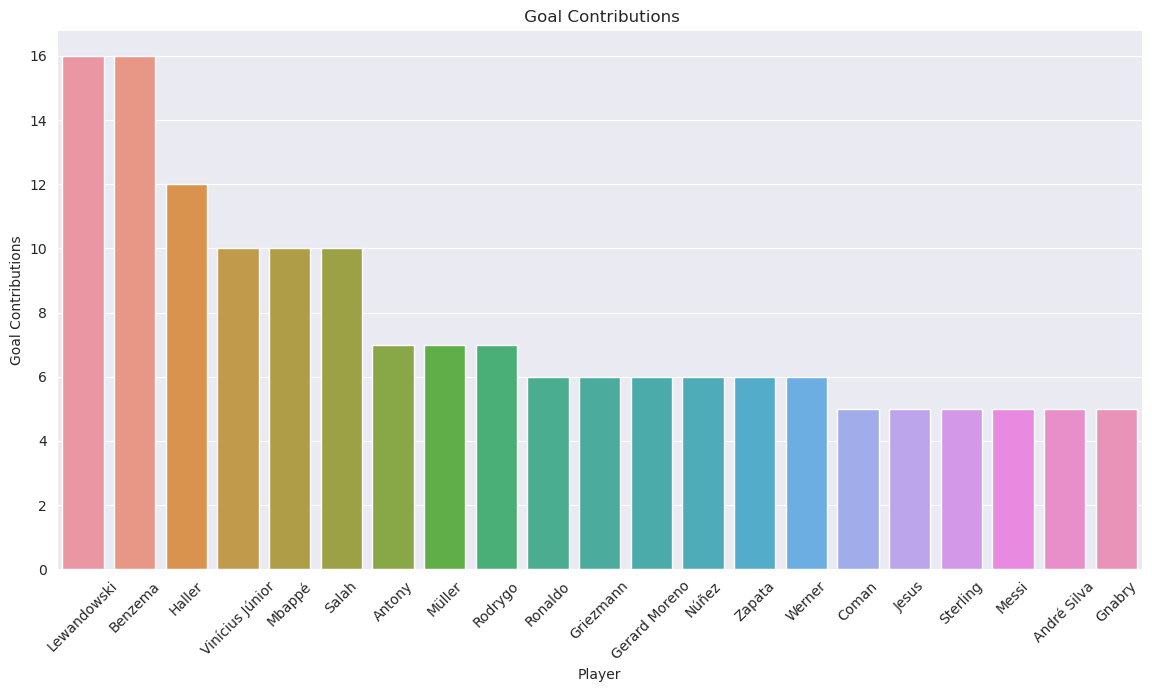

In [15]:
def plot_bar(data, y, ylabel, title=''):
    plt.figure(figsize=(14,7))
    bar_plot = sns.barplot(data=data, x='player_name', y=y)
    
    plt.title(f'{title} {ylabel}')
    plt.xlabel('Player')
    plt.ylabel(ylabel)
    
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
        
forwards_df = forwards_df.sort_values('goal_contributions', ascending=False).reset_index(drop=True)
plot_bar(forwards_df.loc[:20, :], 'goal_contributions', ylabel='Goal Contributions')

In [16]:
min_played_threshold = 180
forwards_df = forwards_df[forwards_df['minutes_played'] > min_played_threshold].reset_index(drop=True)

In [17]:
forwards_df['goal_contributions_by_min'] = forwards_df['goal_contributions'] / forwards_df['minutes_played']
forwards_cols.append('goal_contributions_by_min')
forwards_df.loc[:, forwards_cols].head()

,player_name,club,goals,offsides,assists,goal_contributions,goal_contributions_by_min
0,Lewandowski,Bayern,13.0,7.0,3.0,16.0,0.018265
1,Benzema,Real Madrid,15.0,9.0,1.0,16.0,0.014467
2,Haller,Ajax,11.0,3.0,1.0,12.0,0.017964
3,Vinícius Júnior,Real Madrid,4.0,4.0,6.0,10.0,0.008340
4,Mbappé,Paris,6.0,8.0,4.0,10.0,0.014859


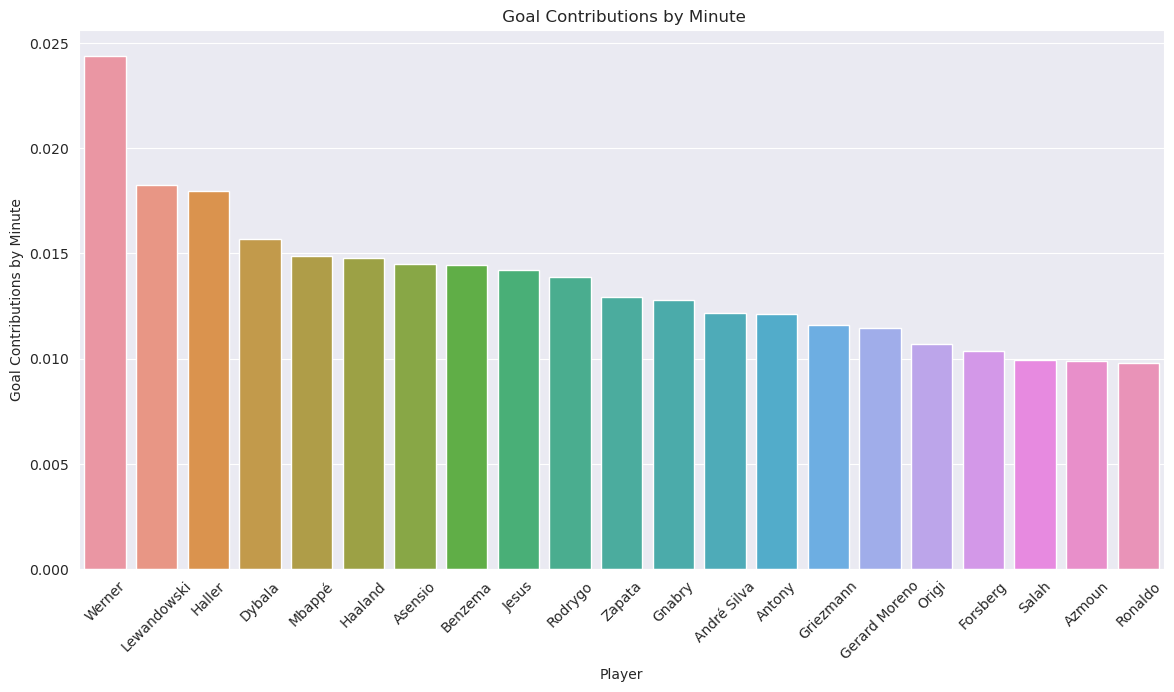

In [18]:
forwards_df = forwards_df.sort_values('goal_contributions_by_min', ascending=False).reset_index(drop=True)
plot_bar(forwards_df.loc[:20,:], 'goal_contributions_by_min', ylabel='Goal Contributions by Minute')

# Midfielders

In [19]:
midfielders_df = players_df[players_df['position'] == 'Midfielder'].sort_values('pass_accuracy', ascending=False).reset_index(drop=True)
midfielders_cols = ['player_name', 'club', 'pass_accuracy', 'pass_attempted', 'pass_completed', 'assists']
midfielders_df.loc[:, midfielders_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists
0,Erokhin,Zenit,98.0,27.0,26.0,0.0
1,J. Timber,Ajax,95.8,497.0,474.0,0.0
2,Nianzou,Bayern,94.5,199.0,192.0,0.0
3,Maycon,Shakhtar Donetsk,94.5,395.0,373.0,0.0
4,Marcos Antônio,Shakhtar Donetsk,94.4,234.0,224.0,0.0


In [20]:
pass_threshold = midfielders_df.pass_attempted.mean()
print('Pass threshold:', pass_threshold)

Pass threshold: 162.0731707317073


In [21]:
midfielders_df = midfielders_df[midfielders_df['pass_attempted'] > pass_threshold].sort_values('pass_accuracy', ascending=False).reset_index(drop=True)
midfielders_df.loc[:, midfielders_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists
0,J. Timber,Ajax,95.8,497.0,474.0,0.0
1,Maycon,Shakhtar Donetsk,94.5,395.0,373.0,0.0
2,Nianzou,Bayern,94.5,199.0,192.0,0.0
3,Marcos Antônio,Shakhtar Donetsk,94.4,234.0,224.0,0.0
4,Rodri,Man. City,94.2,806.0,760.0,0.0


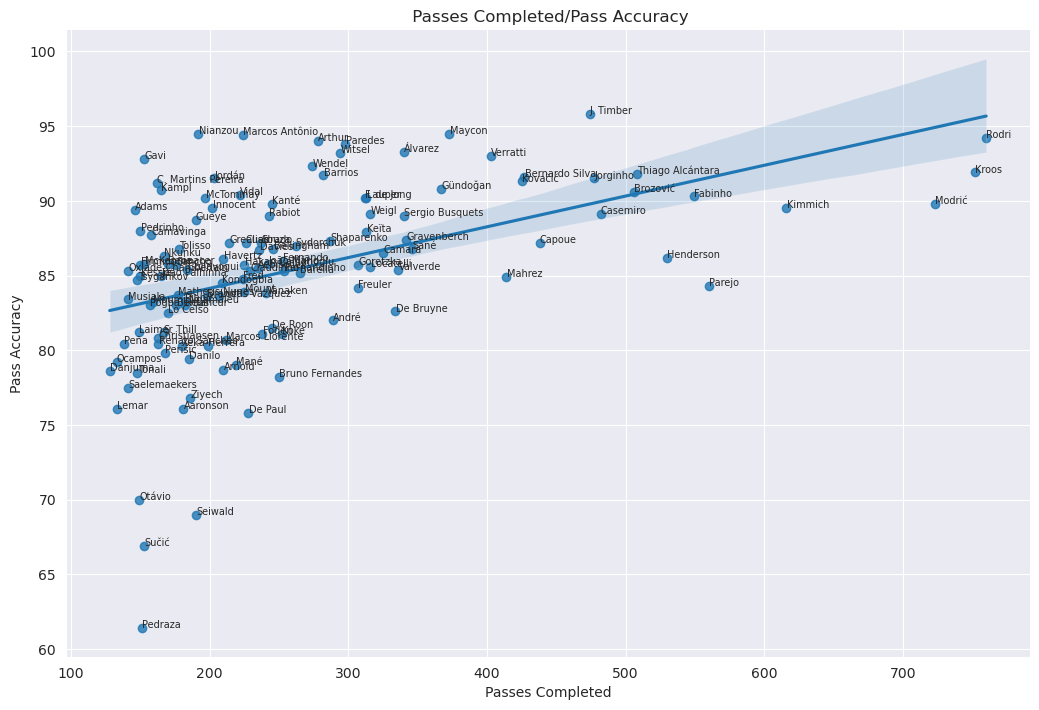

In [22]:
plot_scatter(midfielders_df, 'pass_completed', 'pass_accuracy', xlabel='Passes Completed', ylabel='Pass Accuracy', text_spacing=0.2)

In [23]:
midfielders_df['assists_per_min'] = midfielders_df['assists'] / midfielders_df['minutes_played']
midfielders_cols.append('assists_per_min')
midfielders_df = midfielders_df.sort_values('assists_per_min', ascending=False).reset_index(drop=True)
midfielders_df.loc[:, midfielders_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists,assists_per_min
0,Bruno Fernandes,Man. United,78.2,324.0,250.0,7.0,0.013462
1,João Mário,Benfica,85.8,268.0,242.0,4.0,0.008114
2,Pjanic,Beşiktaş,83.3,216.0,182.0,2.0,0.007663
3,Sané,Bayern,86.8,398.0,346.0,6.0,0.007519
4,Bellingham,Dortmund,86.8,281.0,246.0,3.0,0.005964


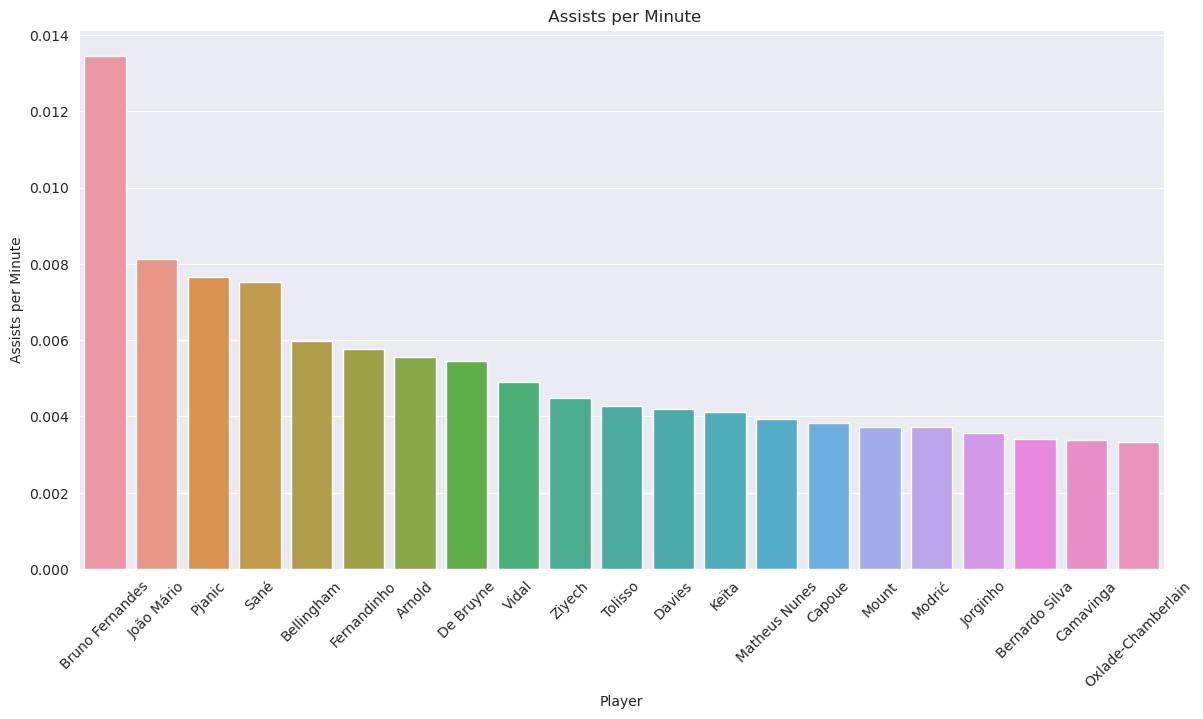

In [24]:
plot_bar(midfielders_df.loc[:20, :], 'assists_per_min', ylabel='Assists per Minute')

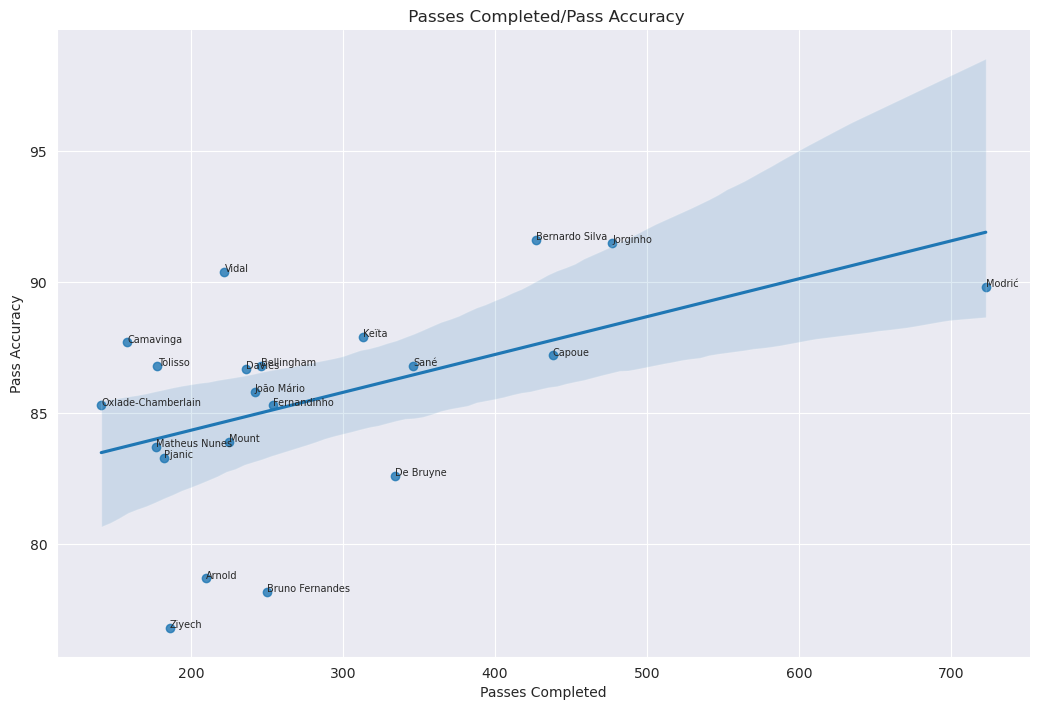

In [25]:
plot_scatter(midfielders_df.loc[:20, :], 'pass_completed', 'pass_accuracy', xlabel='Passes Completed',
            ylabel='Pass Accuracy', text_spacing=0.1)

# Defenders

In [26]:
players_df['clearances_per_min'] = players_df['clearance_attempted'] / players_df['minutes_played']
players_df['tackle_pct'] = (players_df['t_won']*100)/players_df['tackles']

defender_cols = ['player_name', 'club', 't_won', 'tackles','fouls_committed', 
                 'tackle_pct', 'clearance_attempted', 'clearances_per_min']

defender_df = players_df[(players_df['position'] == 'Defender') \
                         & (players_df['minutes_played'] >= min_played_threshold)].reset_index(drop=True)
defender_df.loc[:, defender_cols].head()

,player_name,club,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,Acuña,Sevilla,6.0,8.0,12.0,75.000000,4.0,0.010554
1,Ahmedhodžić,Malmö,3.0,6.0,6.0,50.000000,24.0,0.058111
2,Akanji,Dortmund,2.0,5.0,1.0,40.000000,12.0,0.026667
3,Aké,Man. City,3.0,3.0,3.0,100.000000,19.0,0.058642
4,Alaba,Real Madrid,12.0,18.0,9.0,66.666667,28.0,0.026923


In [27]:
avg_tackles = defender_df['tackles'].mean()
print('Avg tackles:', avg_tackles)


Avg tackles: 6.228571428571429


In [28]:
defender_df = defender_df[defender_df['tackles'] > avg_tackles].reset_index(drop=True)
defender_df.loc[:, defender_cols].head()

,player_name,club,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,Acuña,Sevilla,6.0,8.0,12.0,75.000000,4.0,0.010554
1,Alaba,Real Madrid,12.0,18.0,9.0,66.666667,28.0,0.026923
2,Albiol,Villarreal,6.0,9.0,9.0,66.666667,62.0,0.059330
3,Alex Sandro,Juventus,4.0,11.0,8.0,36.363636,11.0,0.019892
4,Bastoni,Inter,2.0,7.0,11.0,28.571429,18.0,0.027027


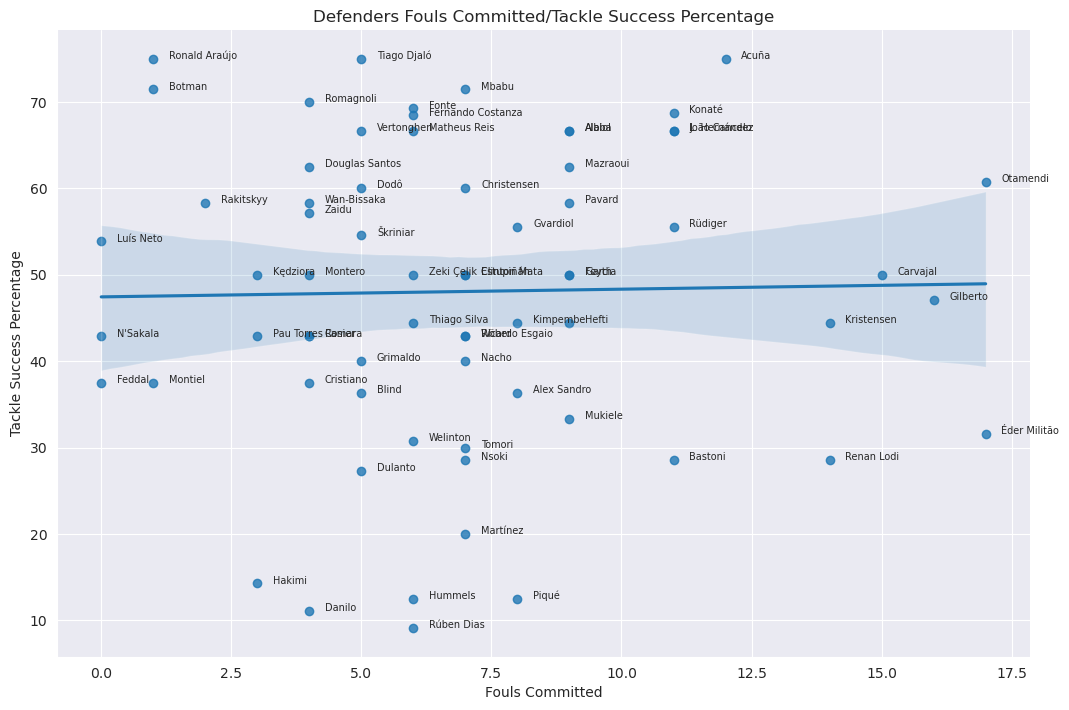

In [29]:
plot_scatter(defender_df, 'fouls_committed', 'tackle_pct', 
            xlabel='Fouls Committed', ylabel='Tackle Success Percentage', title='Defenders')

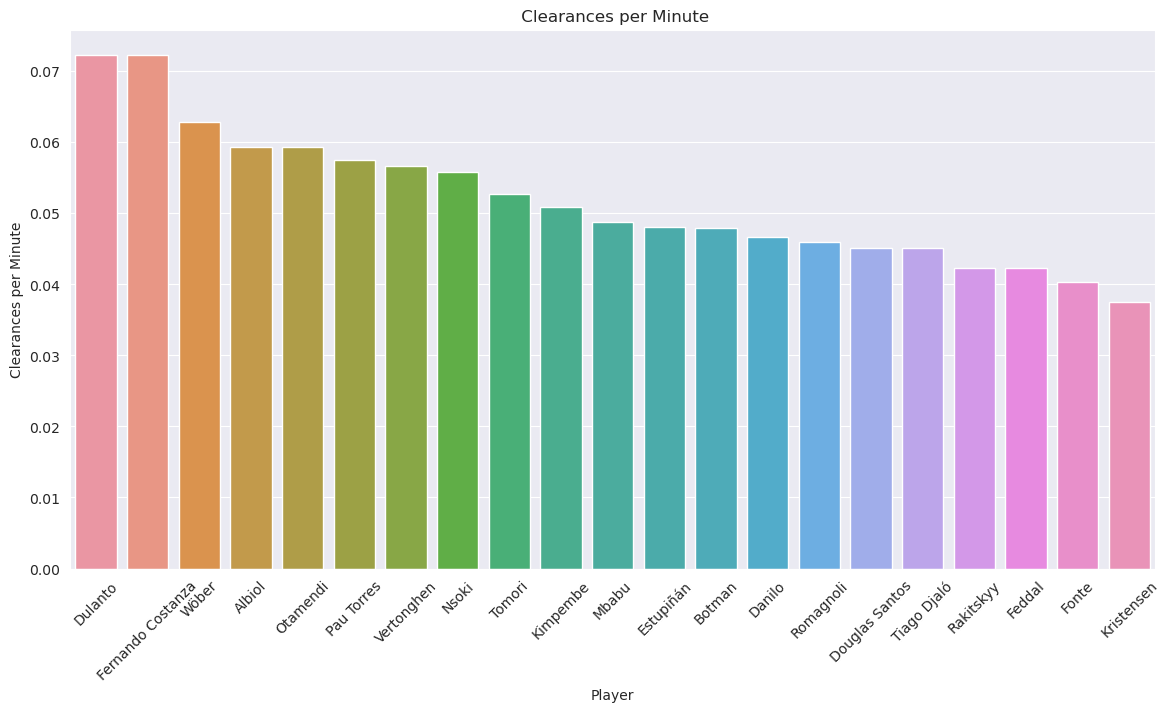

In [30]:
defender_df = defender_df.sort_values('clearances_per_min', ascending=False).reset_index(drop=True)
plot_bar(defender_df.loc[:20, :], 'clearances_per_min', ylabel='Clearances per Minute')

# Goalkeepers

In [31]:
keepers_df = players_df[players_df['position'] == 'Goalkeeper']
keepers_cols = ['player_name', 'club', 'saved', 'conceded', 'saved_penalties', 'cleansheets']
keepers_df.loc[:, keepers_cols].head()

,player_name,club,saved,conceded,saved_penalties,cleansheets
7,Adán,Sporting CP,17.0,13.0,0.0,2.0
23,Alisson Becker,Liverpool,15.0,14.0,0.0,4.0
35,Athanasiadis,Sheriff,29.0,8.0,0.0,1.0
73,Bounou,Sevilla,14.0,5.0,0.0,2.0
74,Boyko,Dynamo Kyiv,4.0,0.0,0.0,1.0


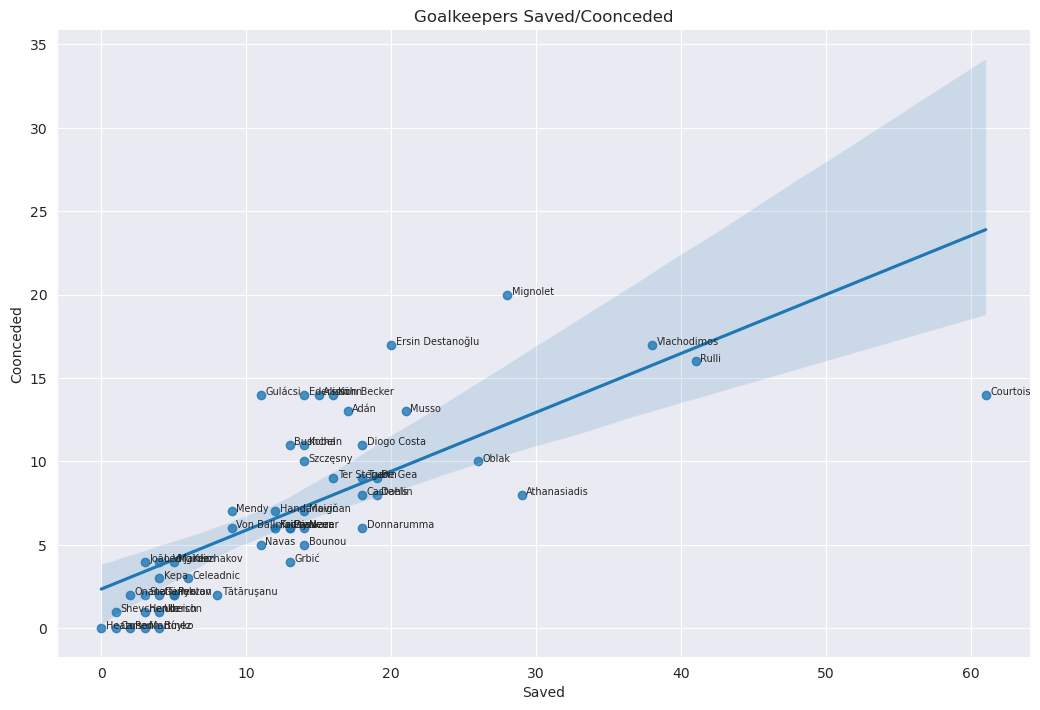

In [32]:
plot_scatter(keepers_df, 'saved', 'conceded', 
             xlabel='Saved', ylabel='Coonceded', title='Goalkeepers')

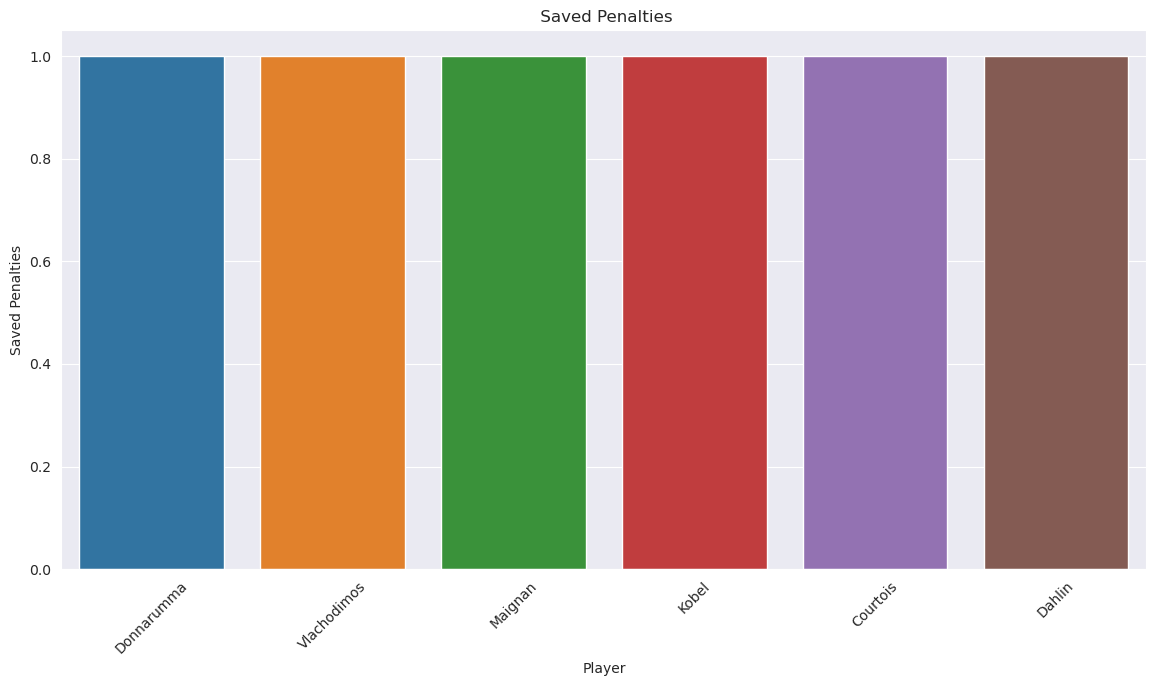

In [33]:
keepers_df = keepers_df.sort_values('saved_penalties', ascending=False).reset_index(drop=True)
plot_bar(keepers_df.loc[:5,:], 'saved_penalties', ylabel='Saved Penalties')

# Team of the Tournament

In [34]:
tott_keepers = ['Courtois']
tott_keepers_df = keepers_df[keepers_df['player_name'].isin(tott_keepers)].reset_index(drop=True)
tott_keepers_df.loc[:, keepers_cols].head()

,player_name,club,saved,conceded,saved_penalties,cleansheets
0,Courtois,Real Madrid,61.0,14.0,1.0,5.0


In [35]:
tott_defenders = [
    'Botman',
    'Ronald Araújo',
    'Fernando Costanza',
    'Tiago Djaló',
]

tott_defenders_df = defender_df[defender_df['player_name'].isin(tott_defenders)].reset_index(drop=True)
tott_defenders_df.loc[:, defender_cols].head()

,player_name,club,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,Fernando Costanza,Sheriff,13.0,19.0,6.0,68.421053,39.0,0.072222
1,Botman,LOSC,5.0,7.0,1.0,71.428571,20.0,0.047847
2,Tiago Djaló,LOSC,6.0,8.0,5.0,75.000000,24.0,0.045028
3,Ronald Araújo,Barcelona,6.0,8.0,1.0,75.000000,9.0,0.024523


In [36]:
tott_mids = [
    'Modrić',
    'Bruno Fernandes',
    'João Mário',
]
tott_mids_df = midfielders_df[midfielders_df['player_name'].isin(tott_mids)].reset_index(drop=True)
tott_mids_df.loc[:, midfielders_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists,assists_per_min
0,Bruno Fernandes,Man. United,78.2,324.0,250.0,7.0,0.013462
1,João Mário,Benfica,85.8,268.0,242.0,4.0,0.008114
2,Modrić,Real Madrid,89.8,799.0,723.0,4.0,0.003714


In [37]:
tott_forwards = [
    'Lewandowski',
    'Haller',
    'Benzema'
]
tott_forwards_df = forwards_df[forwards_df['player_name'].isin(tott_forwards)].reset_index(drop=True)
tott_forwards_df.loc[:, forwards_cols].head()

,player_name,club,goals,offsides,assists,goal_contributions,goal_contributions_by_min
0,Lewandowski,Bayern,13.0,7.0,3.0,16.0,0.018265
1,Haller,Ajax,11.0,3.0,1.0,12.0,0.017964
2,Benzema,Real Madrid,15.0,9.0,1.0,16.0,0.014467


# Full Team of the Tournament

In [38]:
tott = pd.concat([
    tott_keepers_df,
    tott_defenders_df,
    tott_mids_df,
    tott_forwards_df
])

tott.loc[:, ['player_name', 'position', 'club']].reset_index(drop=True).head(11)

,player_name,position,club
0,Courtois,Goalkeeper,Real Madrid
1,Fernando Costanza,Defender,Sheriff
2,Botman,Defender,LOSC
3,Tiago Djaló,Defender,LOSC
4,Ronald Araújo,Defender,Barcelona
5,Bruno Fernandes,Midfielder,Man. United
6,João Mário,Midfielder,Benfica
7,Modrić,Midfielder,Real Madrid
8,Lewandowski,Forward,Bayern
9,Haller,Forward,Ajax
